In [17]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Carlos Vesga/OneDrive - Universidad del Norte/Escritorio/Machine Learning maestria/data_treino_dv_df_2000_2010.csv")

In [3]:
data.shape

(87693, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   HORA (UTC)                                             87693 non-null  object 
 1   VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))             87693 non-null  float64
 2   VENTO, VELOCIDADE HORARIA (m/s)                        87693 non-null  float64
 3   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 4   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 5   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 6   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 7   UMIDADE RELATIVA DO AR, HORARIA (%)                    87693 non-null  float64
 8   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR

In [9]:
data.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


In [10]:
print("# NaN values:", data.isna().sum().sum())

# NaN values: 0


In [13]:
data.columns=['HORA','Direccion','Velocidad','Humedad MX', 'Humedad MN', 'Temp MX', 'Temp MN', 'Humedad relativa', 'Presion atmosferica','Precipitacion','MX vel','Presion MX','Presion MN']

In [14]:
data.head()

,HORA,Direccion,Velocidad,Humedad MX,Humedad MN,Temp MX,Temp MN,Humedad relativa,Presion atmosferica,Precipitacion,MX vel,Presion MX,Presion MN
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


In [23]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['HORA'], dtype='object')
Numerical Variables:
['Direccion', 'Velocidad', 'Humedad MX', 'Humedad MN', 'Temp MX', 'Temp MN', 'Humedad relativa', 'Presion atmosferica', 'Precipitacion', 'MX vel', 'Presion MX', 'Presion MN']


In [22]:
Y = data.Velocidad
Y.head()

0    1.8
1    2.7
2    2.0
3    2.5
4    2.4
Name: Velocidad, dtype: float64

Column:  Direccion
Skew: -0.86
Kurtosis:  -0.82


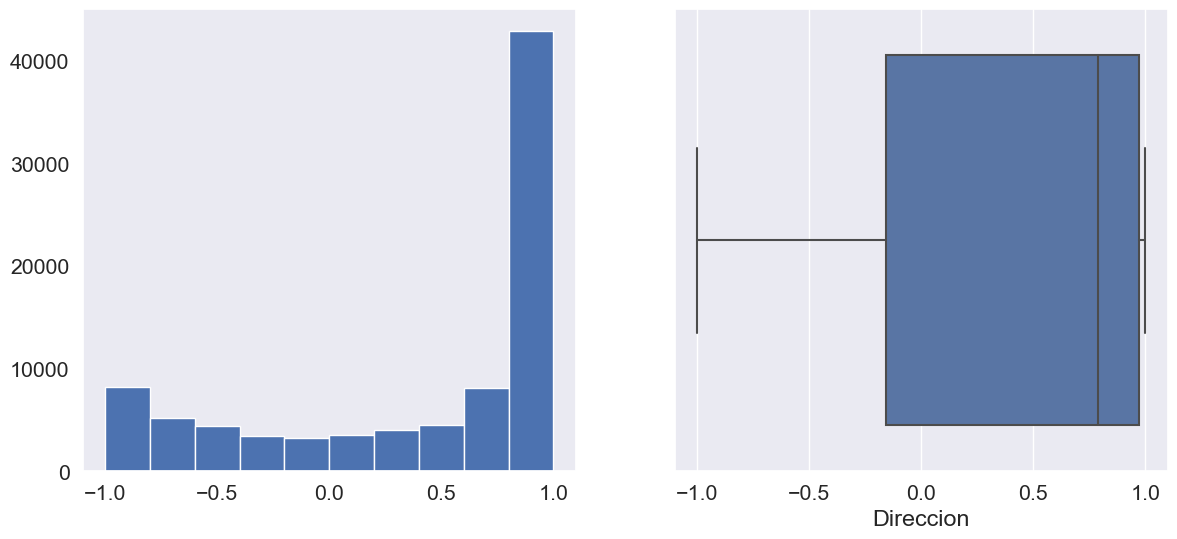

Column:  Velocidad
Skew: 0.37
Kurtosis:  -0.11


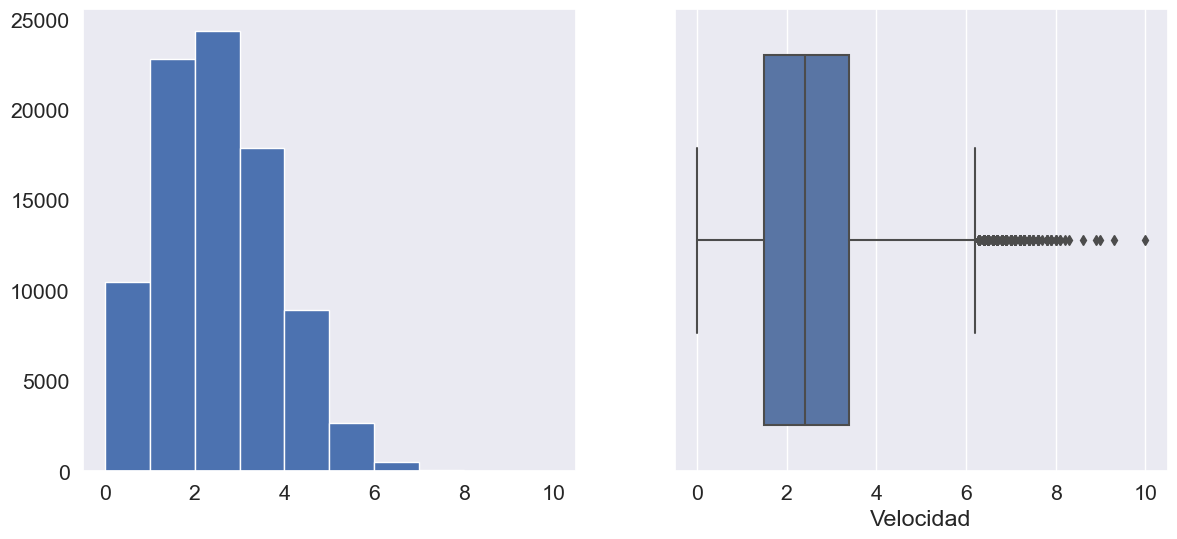

Column:  Humedad MX
Skew: -0.48
Kurtosis:  -0.78


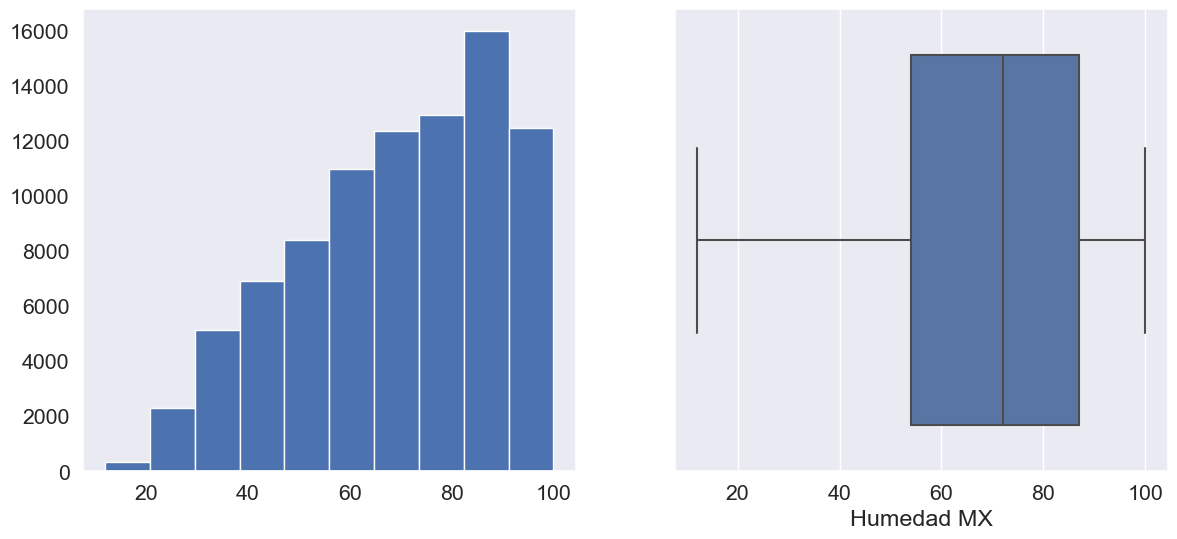

Column:  Humedad MN
Skew: -0.23
Kurtosis:  -0.96


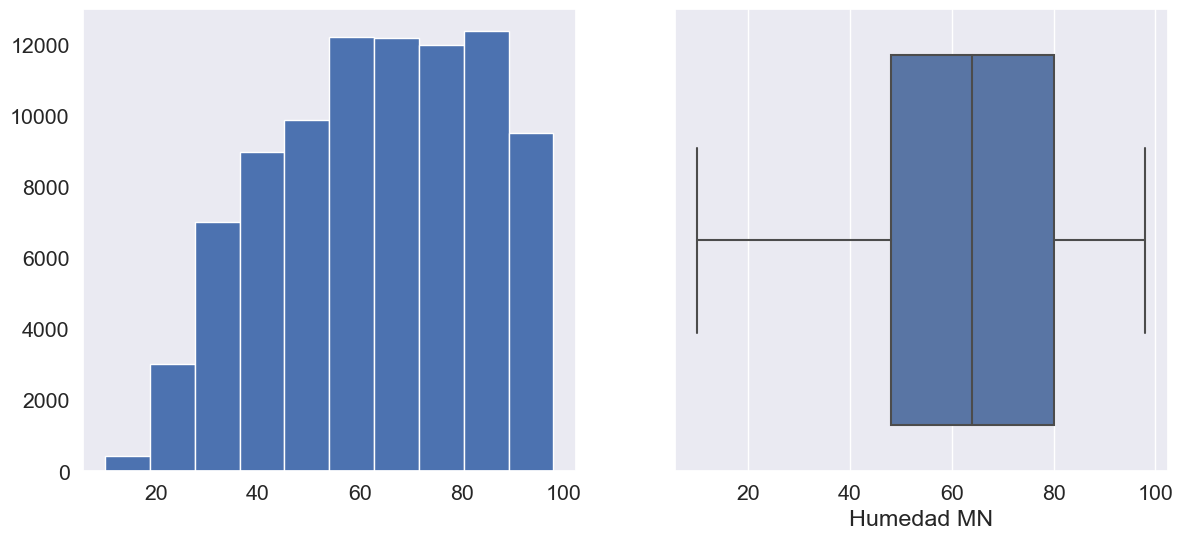

Column:  Temp MX
Skew: 0.26
Kurtosis:  -0.42


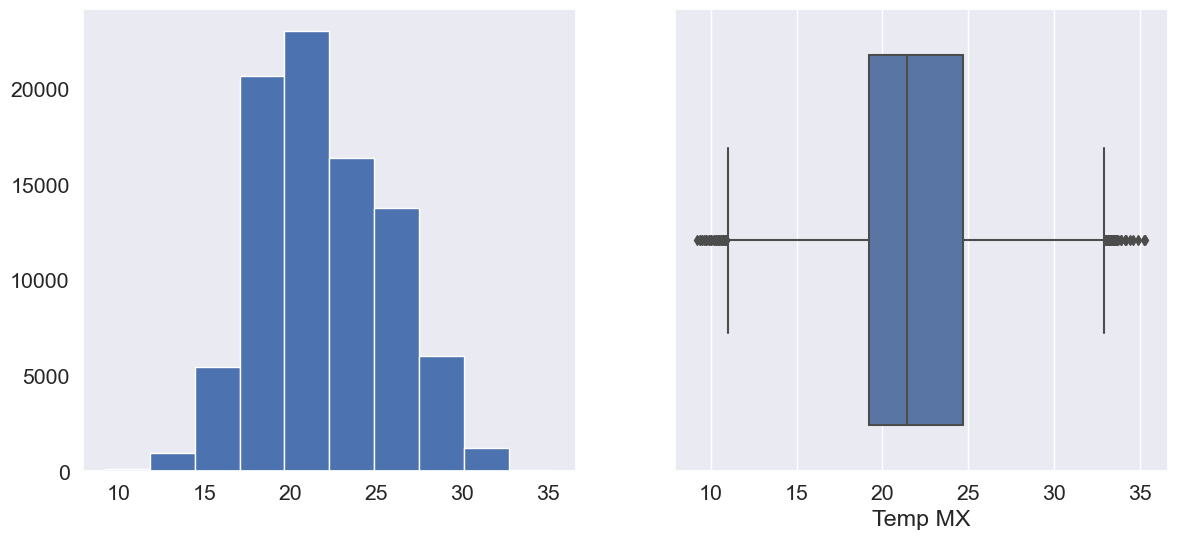

Column:  Temp MN
Skew: 0.24
Kurtosis:  -0.12


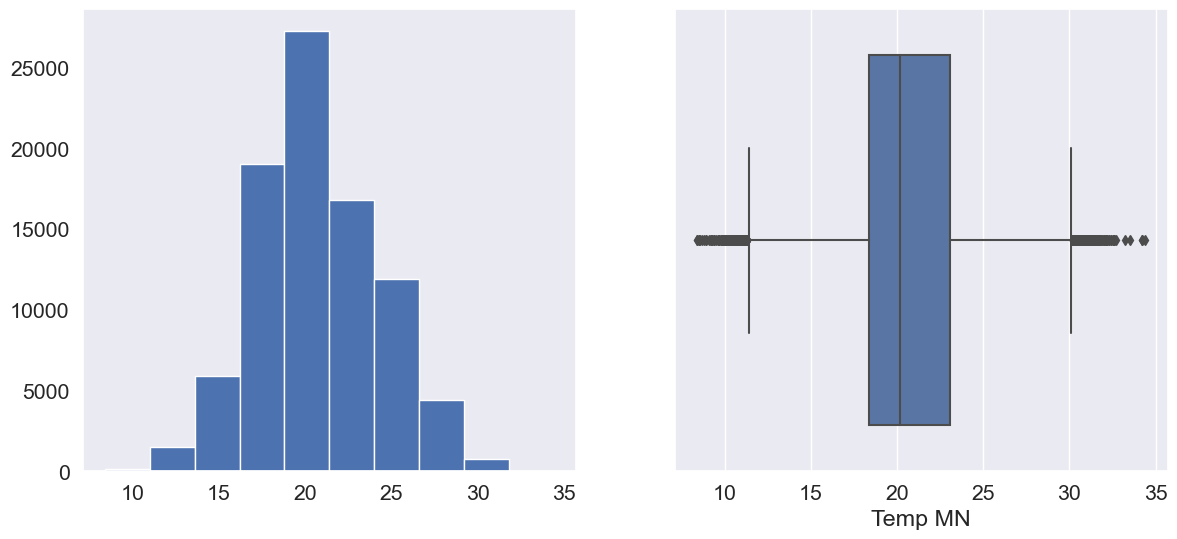

Column:  Humedad relativa
Skew: -0.35
Kurtosis:  -0.89


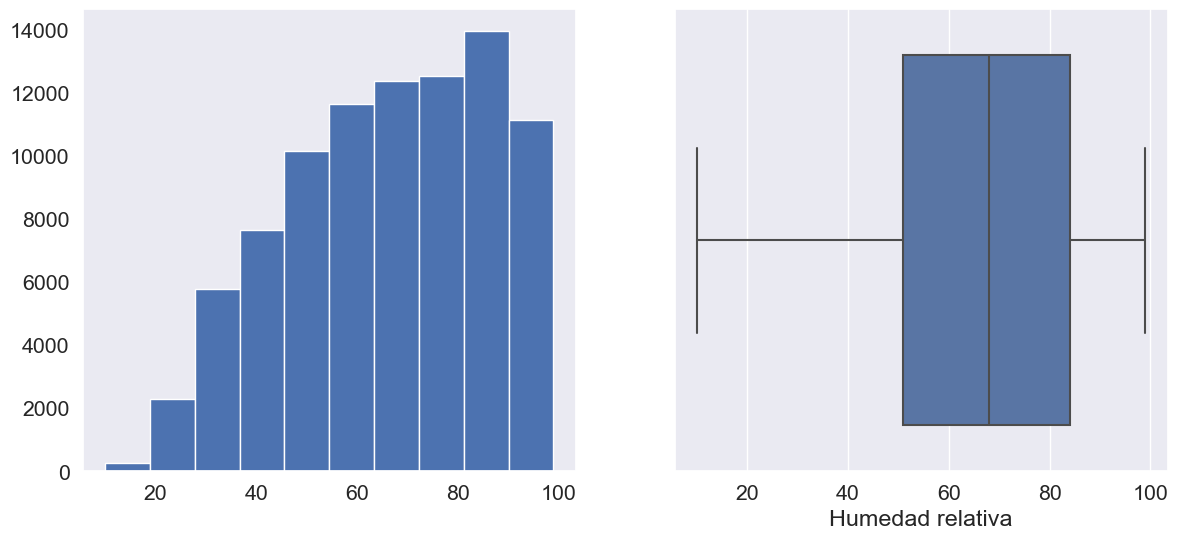

Column:  Presion atmosferica
Skew: 6.18
Kurtosis:  179.64


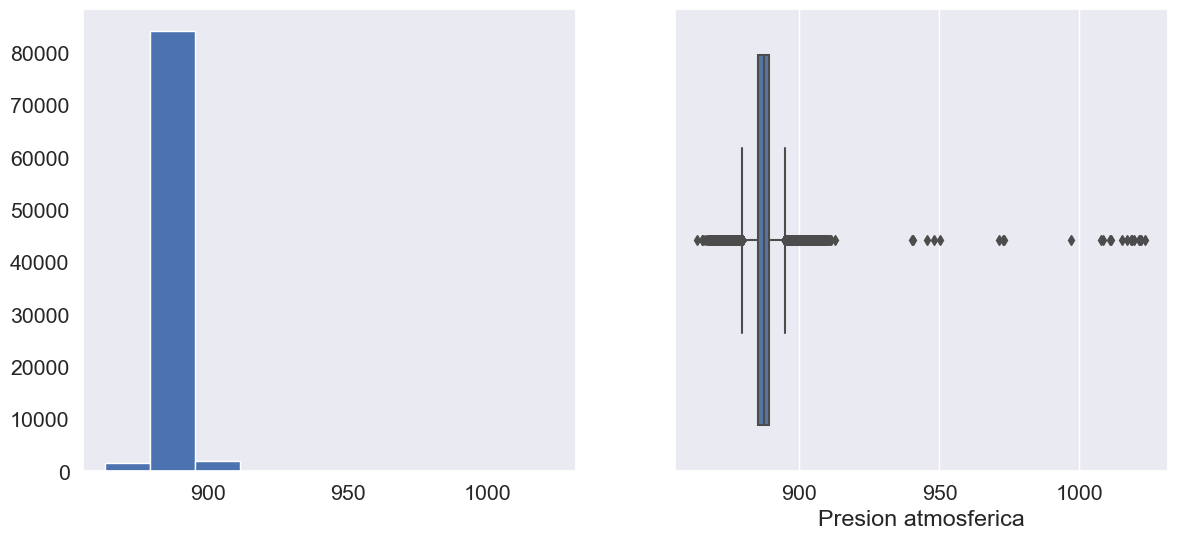

Column:  Precipitacion
Skew: 17.65
Kurtosis:  476.4


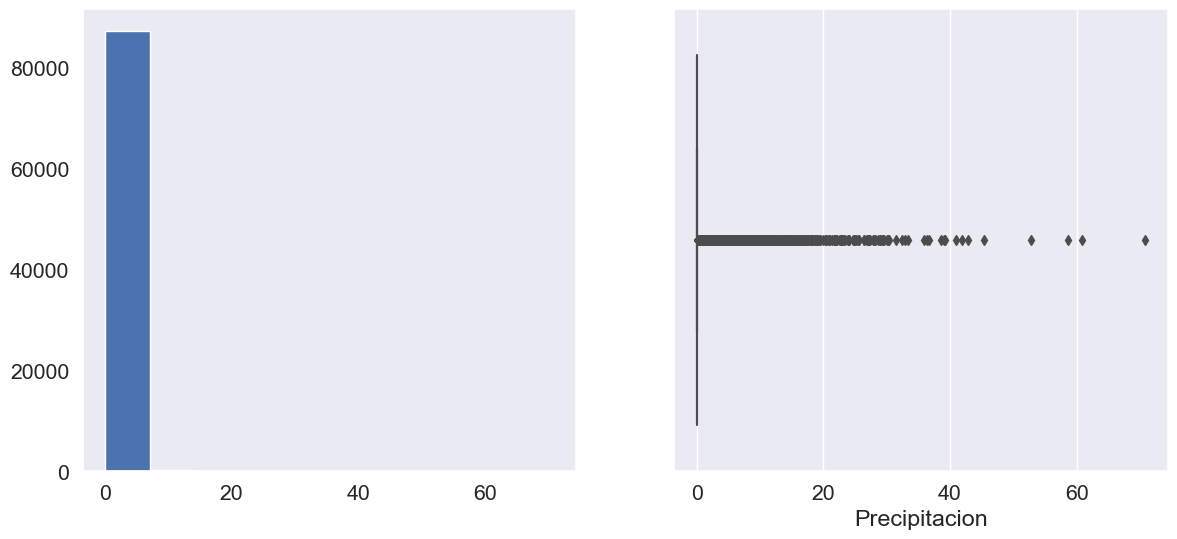

Column:  MX vel
Skew: 0.41
Kurtosis:  0.11


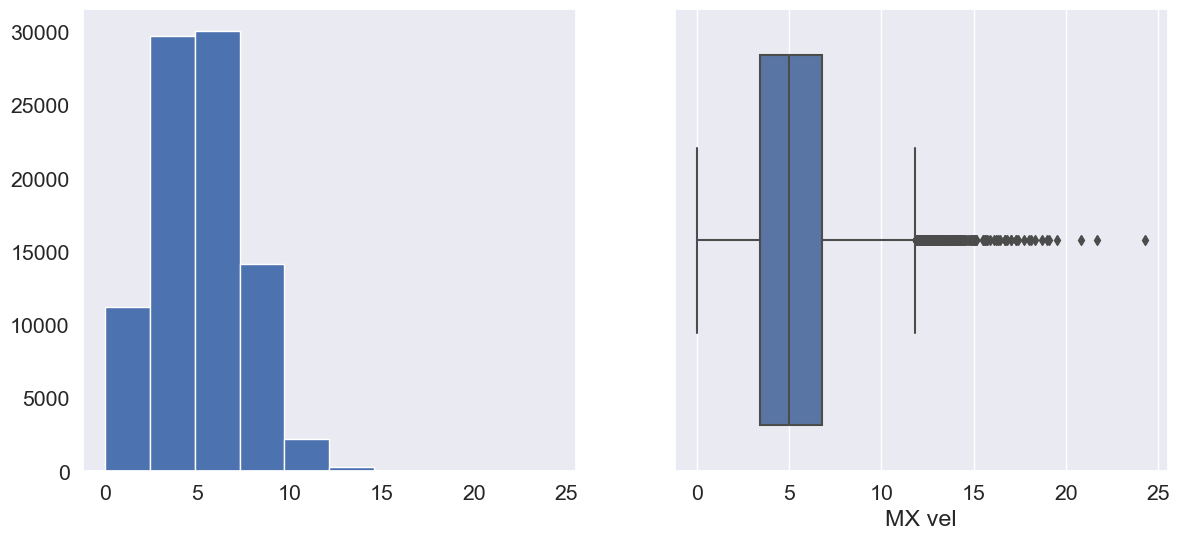

Column:  Presion MX
Skew: 1.02
Kurtosis:  5.82


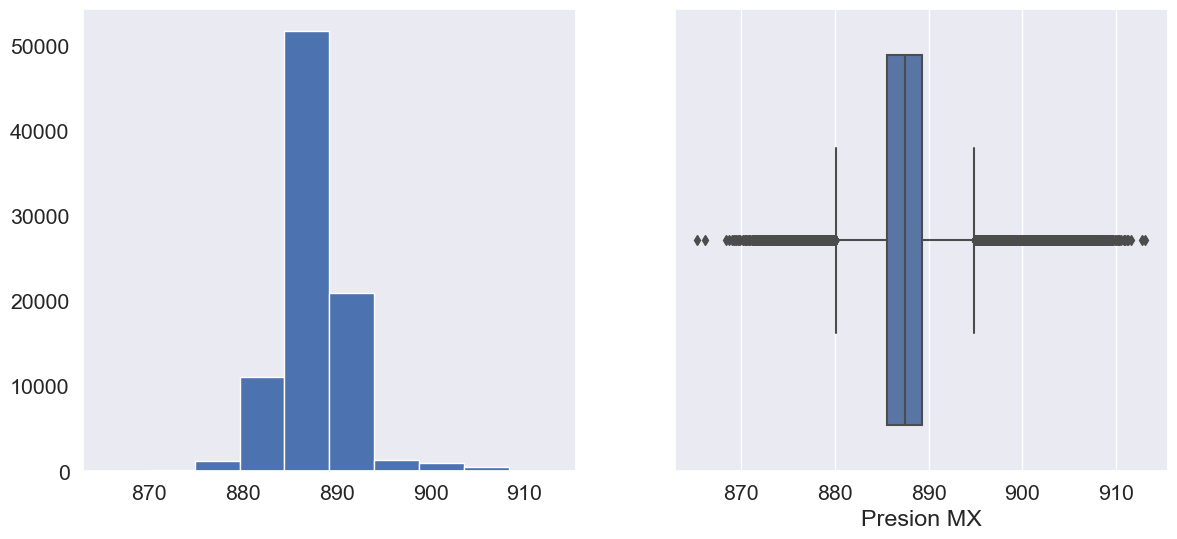

Column:  Presion MN
Skew: 0.33
Kurtosis:  4.91


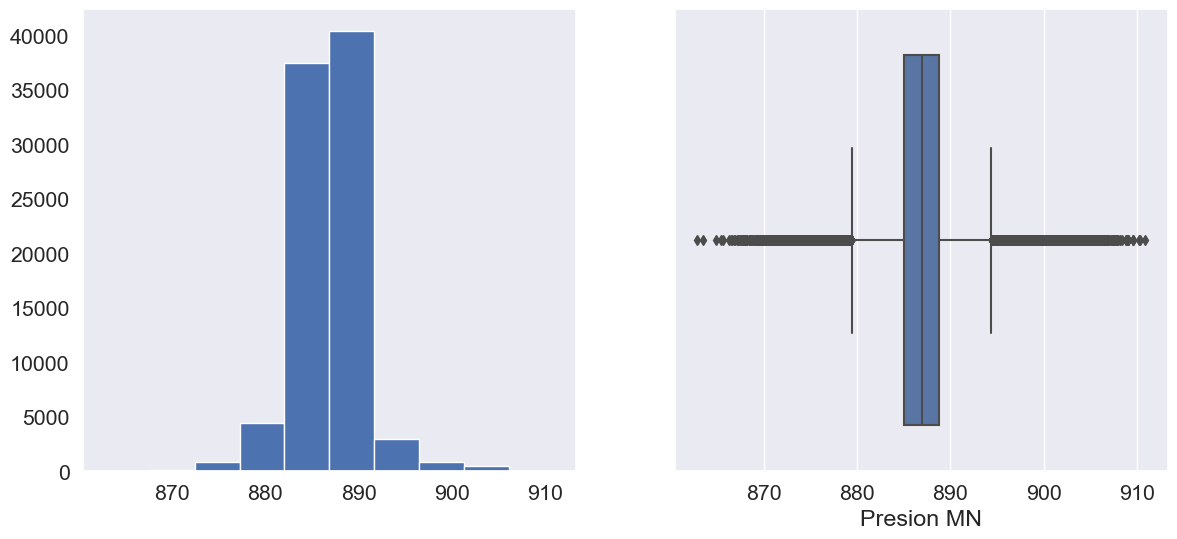

In [24]:
sns.set(font_scale=1.4)
for col in num_cols:
    print('Column: ', col)
    print('Skew:', round(data[col].skew(), 2))
    print('Kurtosis: ', round(data[col].kurtosis(), 2))
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

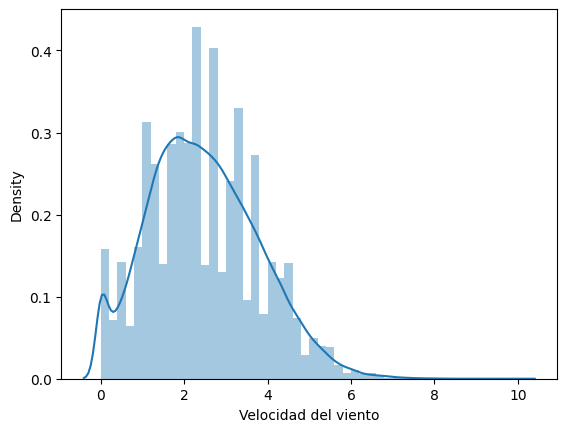

In [18]:
sns.distplot(data["Velocidad"], axlabel="Velocidad del viento");

In [19]:
def scatter_regplot(data, strx, stry):
    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    sns.scatterplot(data=data, x=strx, y=stry, ax=ax[0])
    sns.regplot(data=data, x=strx, y=stry, ax=ax[1]);
    fig.suptitle('Relación entre %s y velocidad'%col)

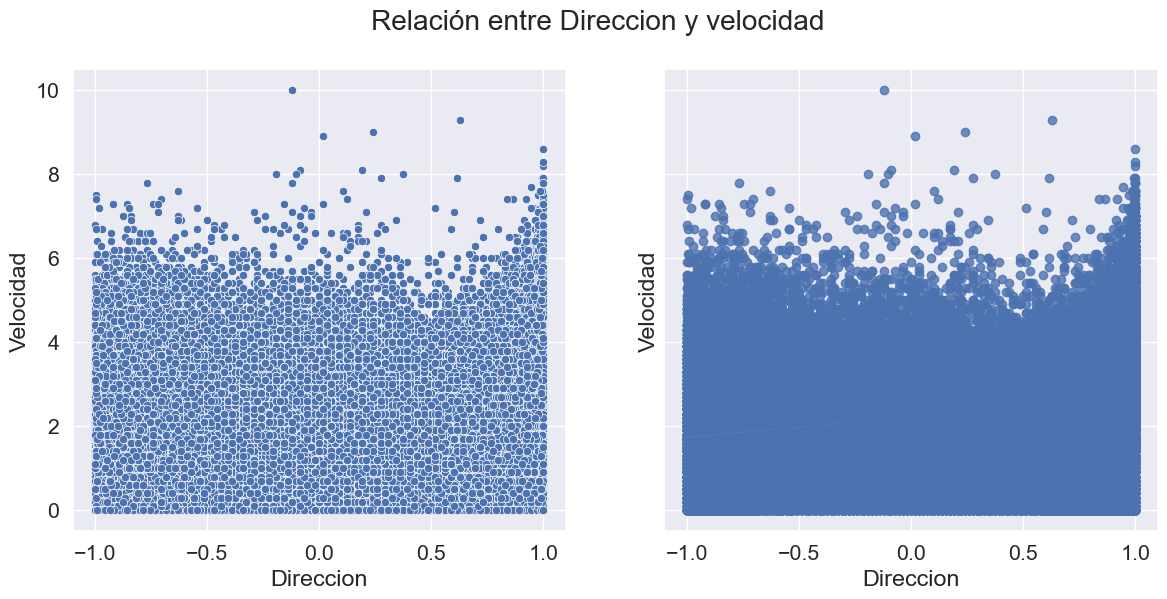

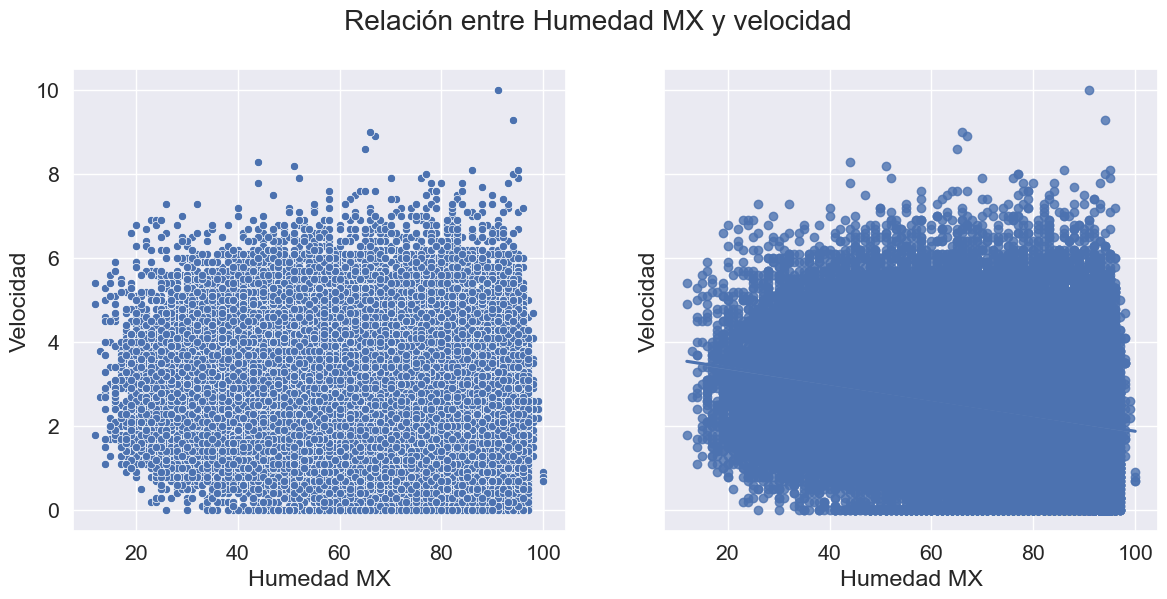

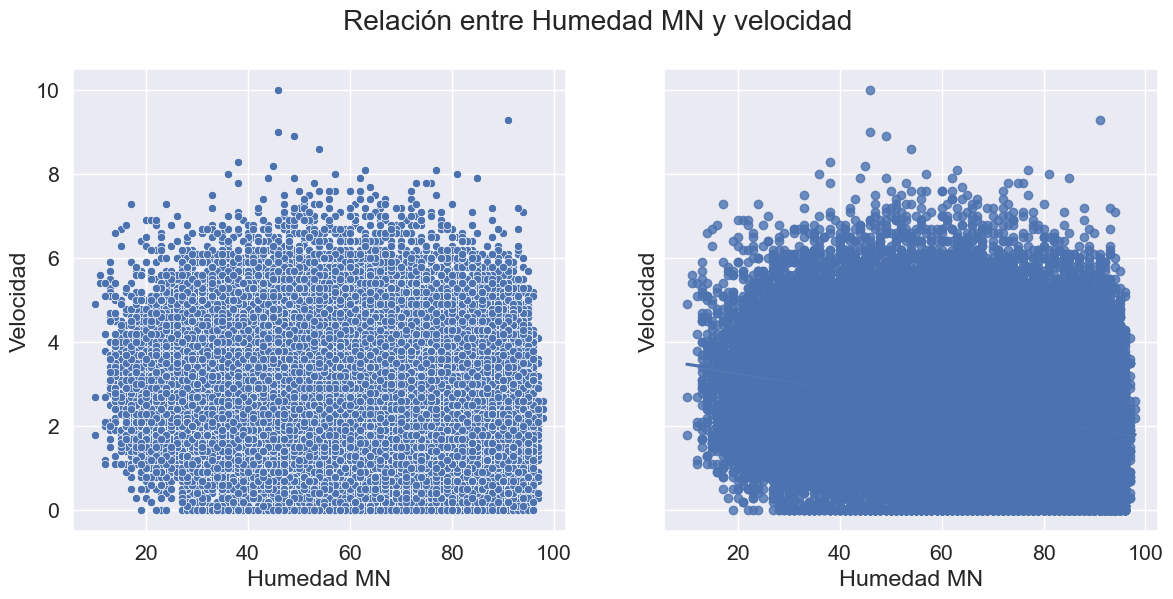

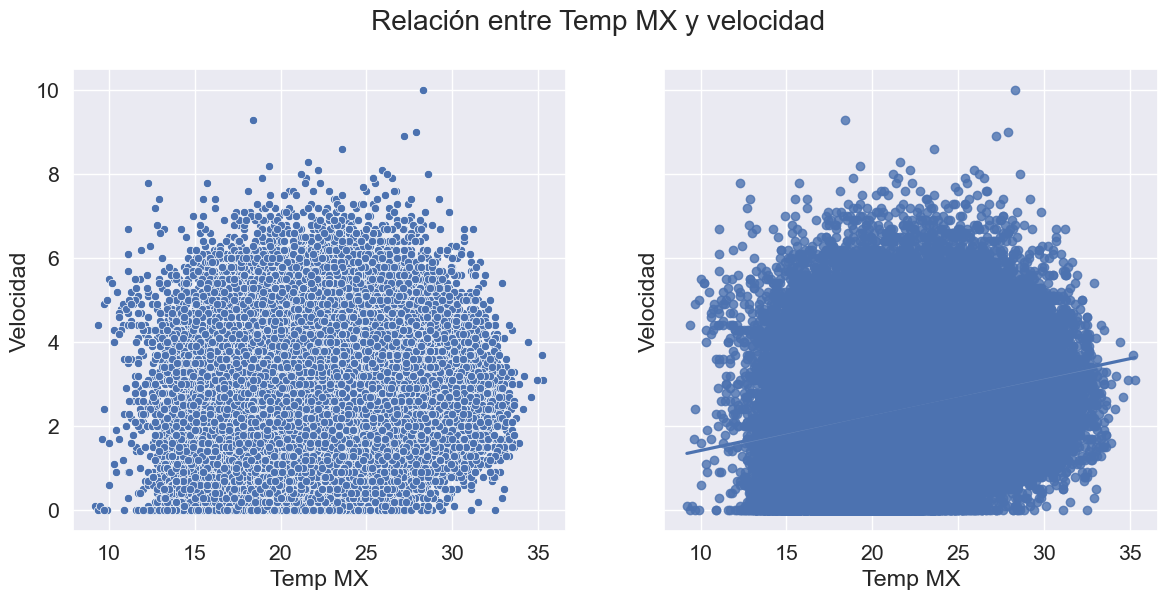

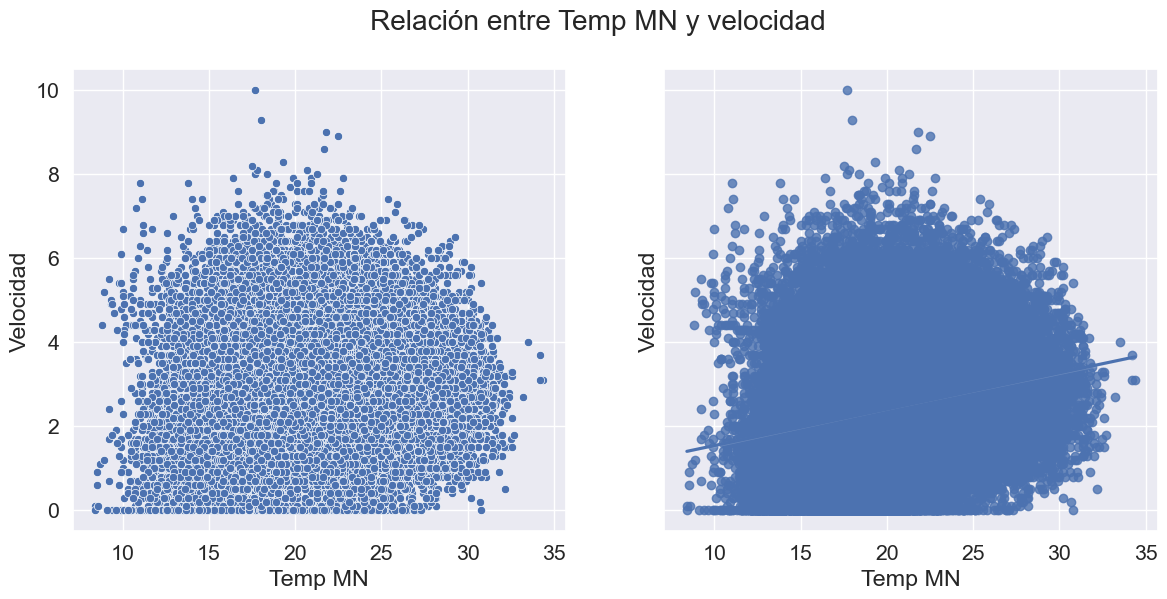

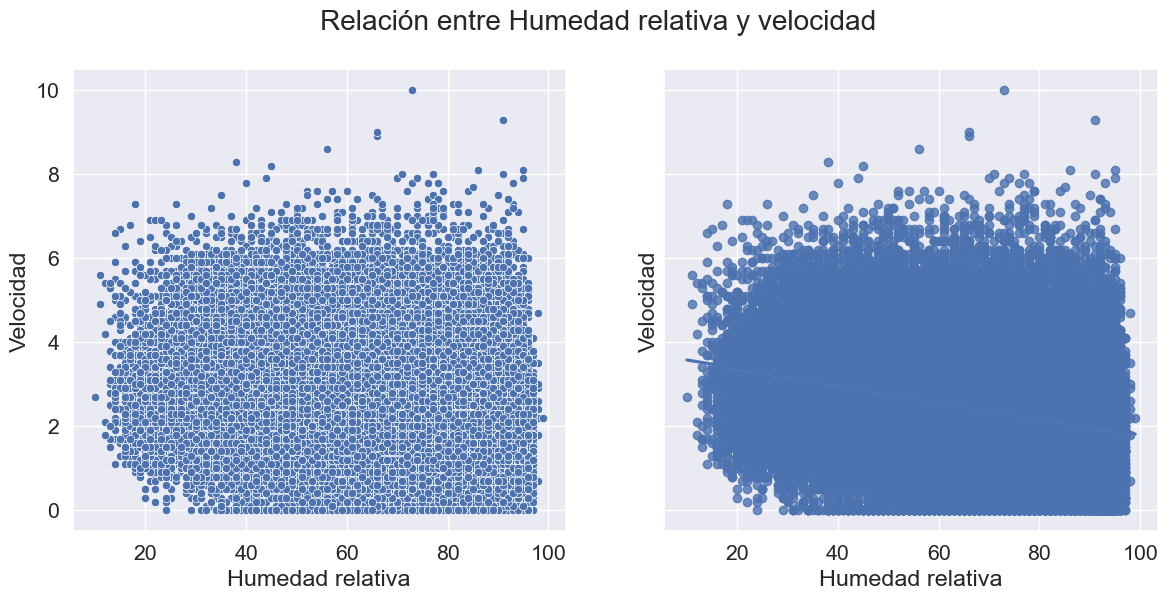

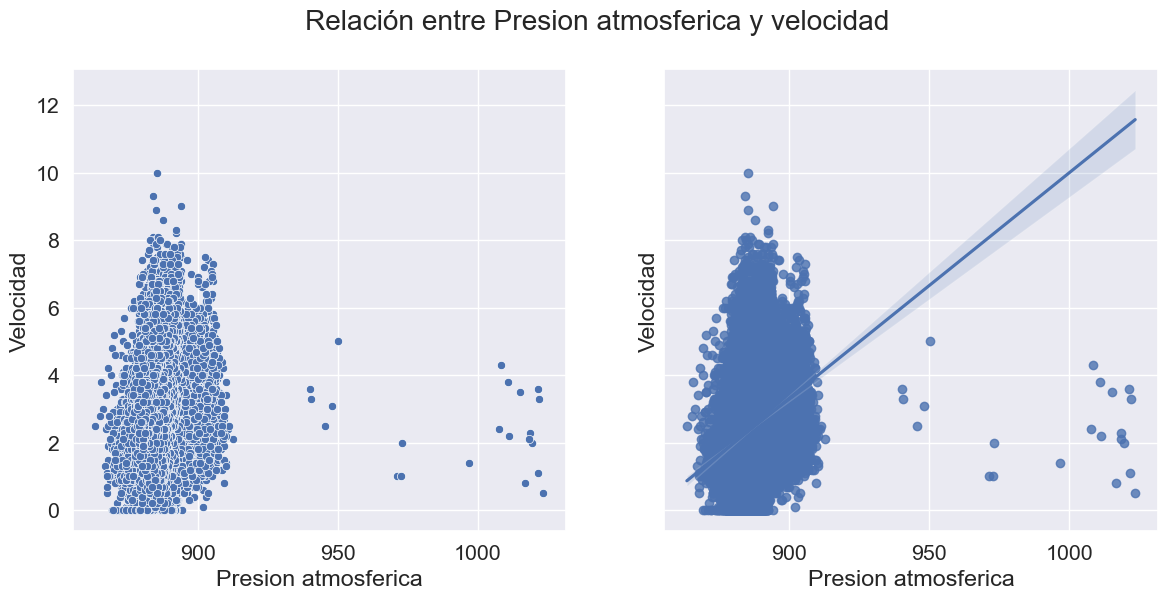

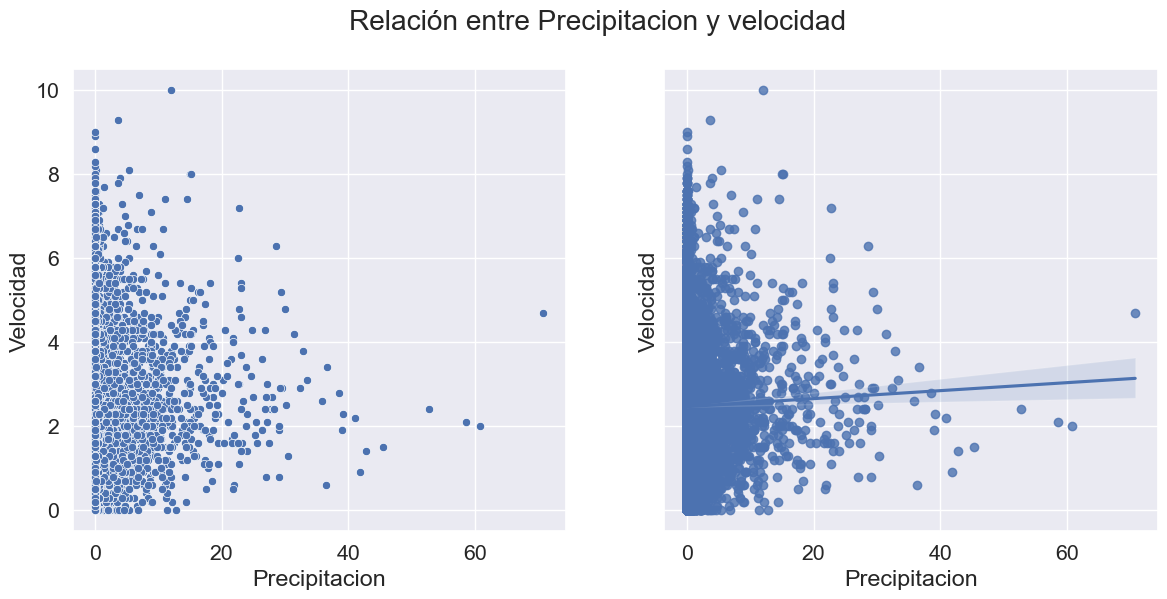

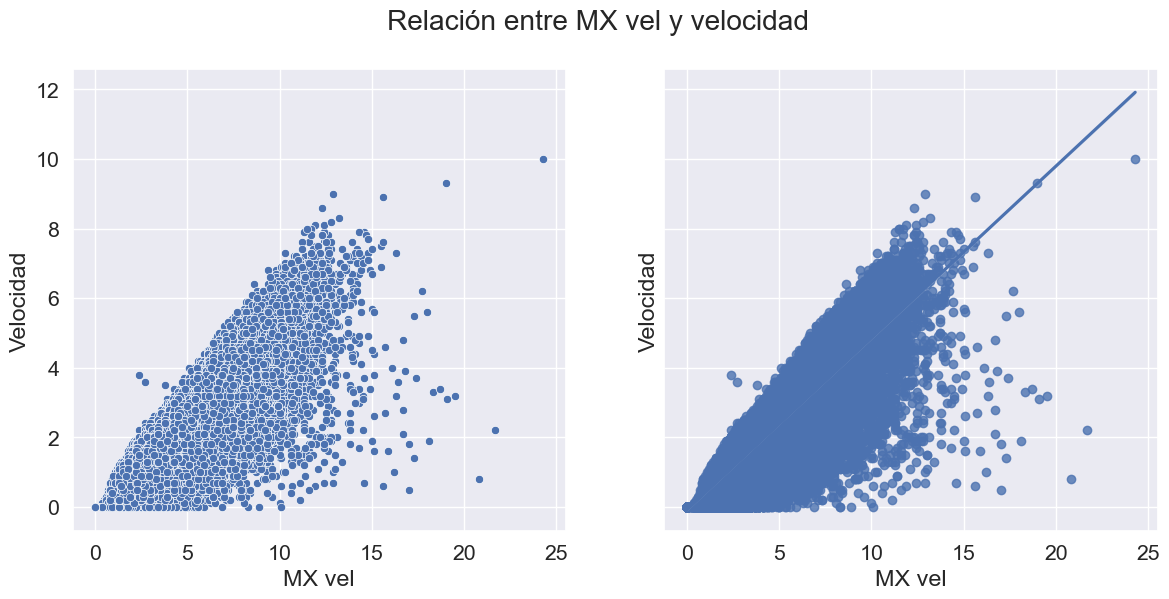

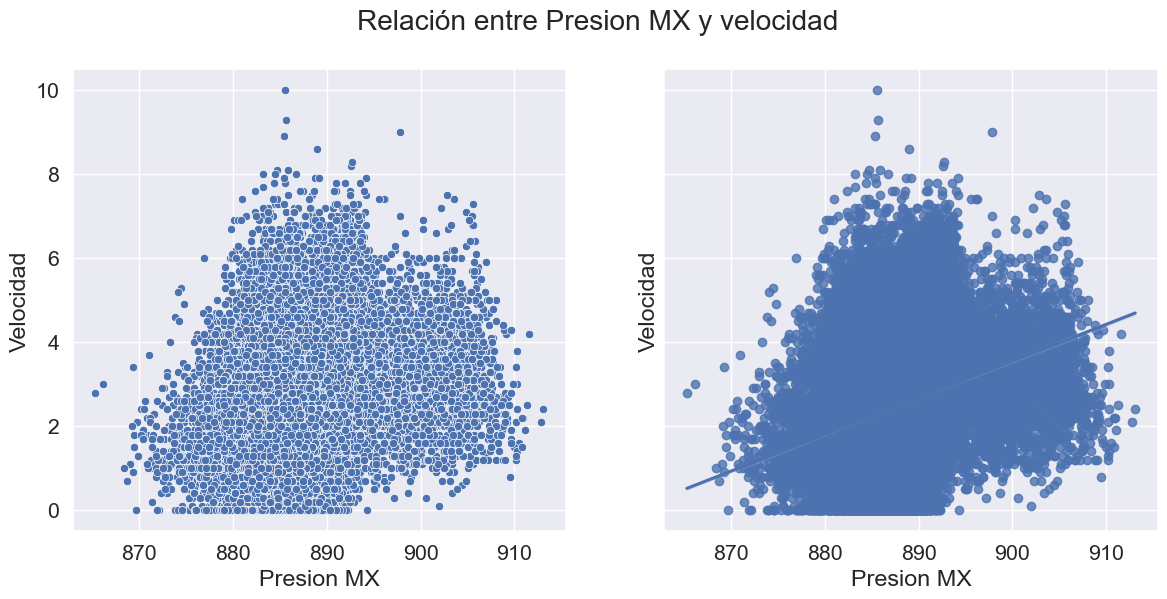

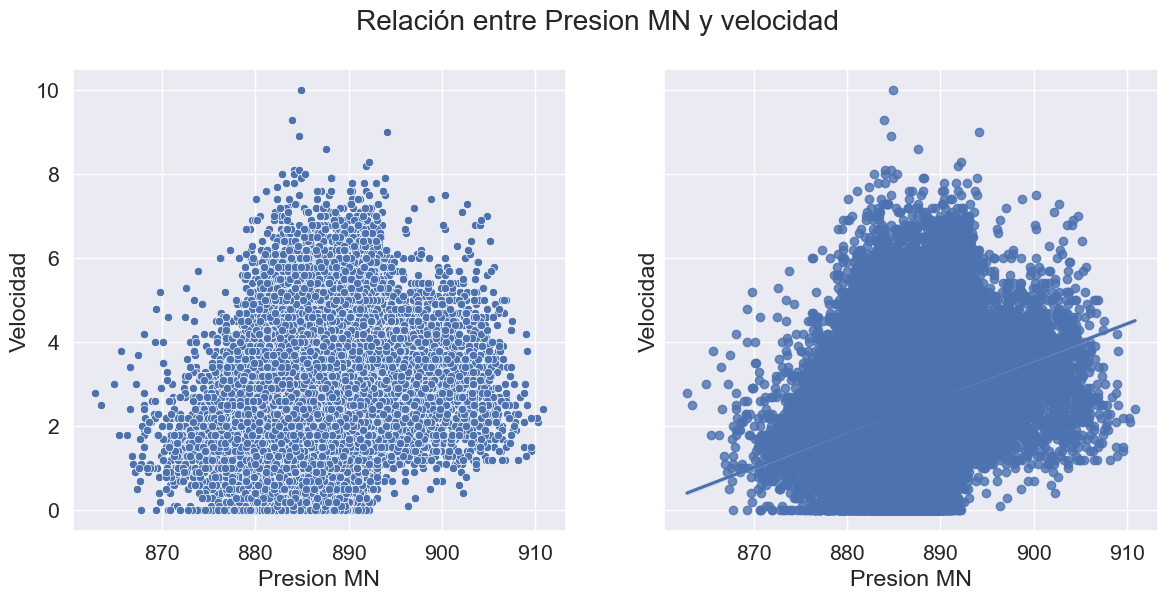

In [26]:
num_cols.remove('Velocidad')
for col in num_cols:
    scatter_regplot(data, col, 'Velocidad')